In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict, namedtuple

import pandas as pd
import numpy as np

from hypergraph.network import *

In [2]:
pd.set_option('display.max_columns', 50)
data_s1 = pd.read_csv("Data S1.csv", low_memory=False)
data_s1.head(100)

,occurrence_no,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,min_ma,phylum,class,order,family,genus,lng,lat,cc,county,paleolng,paleolat,geoplate,formation,stratgroup,member,stratscale,lithology1,environment,stage_name,time_contain,time_major,cid,cID,tID,edge_name,genus_coll,tID_coll,tID_genus,tID_edges,time_coll,time_genus,stage_no,stage_color,stage_max_ma,stage_min_ma,epoch_name,epoch_color,epoch_max_ma,epoch_min_ma,epoch_no
0,1160152,149178,Aristaeomorpha,genus,274645,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Aristeidae,Aristaeomorpha,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Aristaeomorpha,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
1,1160153,149178,Aristaeopsis,genus,274647,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Aristeidae,Aristaeopsis,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Aristaeopsis,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
2,1160154,149178,Aristeus,genus,274649,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Aristeidae,Aristeus,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Aristeus,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
3,1160157,149178,Austropenaeus,genus,274653,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Aristeidae,Austropenaeus,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Austropenaeus,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
4,1160158,149178,Pseudaristeus,genus,274655,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Aristeidae,Pseudaristeus,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Pseudaristeus,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1160902,149178,Strahlaxius,genus,275028,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Strahlaxiidae,Strahlaxius,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Strahlaxius,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
96,1160904,149178,Biffarius,genus,275031,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Callianassidae,Biffarius,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Biffarius,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
97,1160908,149178,Corallianassa,genus,218174,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Callianassidae,Corallianassa,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Corallianassa,1,1,290,290,353,959,99,#FEF2E0,0.0117,0.0,Holocene,#FEF2E0,0.0117,0.0,34
98,1160909,149178,Eucalliax,genus,218179,Holocene,NaN,0.0117,0.0,Arthropoda,Decapoda,Decapoda,Callianassidae,Eucalliax,138.116669,-33.881111,AU,NaN,138.12,-33.88,801,NaN,NaN,NaN,NaN,"""reef rocks""","reef, buildup or bioherm",Holocene,Holocene,Holocene,255,H255,Holocene_H255,Holocene-H255--Eucall

In [3]:
data = data_s1[["collection_no", "genus", "tID", "stage_no", "stage_name"]]

layer_start, layer_stop = 1, 77
selected_layers = data["stage_no"].between(layer_start, layer_stop)

data = data[selected_layers]

data.head(20), len(data)

(      collection_no         genus                 tID  stage_no     stage_name
 1692           3127    Hoploparia      Campanian_H160        76      Campanian
 1693          39620    Hoploparia      Campanian_H160        76      Campanian
 1694          37717     Eodorippe      Campanian_H151        76      Campanian
 1695          66640    Hoploparia      Campanian_H161        76      Campanian
 1696         127328      Palaemon      Campanian_H502        76      Campanian
 1697         185019    Archaeopus      Campanian_H586        76      Campanian
 1698          90157  Eomunidopsis      Campanian_H604        76      Campanian
 1699          90157    Homolopsis      Campanian_H604        76      Campanian
 1700          90160  Eomunidopsis      Campanian_H604        76      Campanian
 1701         123792  Enoploclytia      Campanian_H639        76      Campanian
 1702         123792       Meyeria      Campanian_H639        76      Campanian
 1703           3158   Callianassa  Maas

In [4]:
node_ids = defaultdict(lambda: len(node_ids) + 1)

nodes = {node_ids[genus]: Node(node_ids[genus], genus) for genus in data["genus"].unique()}
nodes[1], len(nodes)

(Node(id=1, name='Hoploparia'), 13276)

In [5]:
import numpy as np

num_collections = data.groupby("stage_name")["collection_no"].count()
num_collections.head(20), len(num_collections)

(stage_name
 Aalenian         1389
 Aeronian         1412
 Albian           3929
 Anisian          3622
 Aptian           3583
 Artinskian       5847
 Asselian         3098
 Bajocian         2785
 Barremian        1190
 Bashkirian       2325
 Bathonian        4814
 Berriasian        966
 Callovian        3864
 Campanian        6439
 Capitanian       5785
 Carnian          2980
 Cenomanian       5702
 Changhsingian    5836
 Coniacian         964
 Dapingian        1272
 Name: collection_no, dtype: int64,
 77)

In [6]:
group_by_genus = data.groupby(["stage_name", "genus"])["collection_no"]
group_by_genus.apply(list).head(40), len(group_by_genus)

(stage_name  genus                           
 Aalenian    Acanthothiris                       [87398, 141209, 141213, 141214, 162835, 162734...
             Acanthothyropsis                             [162835, 162872, 162871, 162870, 162839]
             Acrosmilia                                                                    [41396]
             Actinaraea                                                                    [79538]
             Actinastrea                                                                   [41398]
             Actinostreon                                                            [35451, 8526]
             Aeger                                                                        [138776]
             Allocoeniopsis                                                         [79545, 79543]
             Allocosmia                                                                   [123679]
             Amberleya                                         

In [7]:
NamedHyperEdge = namedtuple("NamedHyperEdge", "id, nodes, omega, name")

edge_ids = defaultdict(lambda: len(edges) + 1)

edges = {}
weights = []

for (edge_name, genus), collections in group_by_genus:
    edge_id = edge_ids[edge_name]
    
    collections_in_edge = num_collections[edge_name]

    gamma = len(collections) / collections_in_edge
        
    if edge_id not in edges:
        omega = collections_in_edge
    
        edges[edge_id] = NamedHyperEdge(edge_id, set(), omega, edge_name)
    
    edge = edges[edge_id]
    
    node_id = node_ids[genus]
    node = nodes[node_id]
    
    if node not in edge.nodes:
        edge.nodes.add(node)
    
    weights.append(Gamma(edge_id, node, gamma))

In [8]:
hypergraph = HyperGraph(nodes.values(), edges.values(), weights)

with open(f"data/paleo-{layer_start}-{layer_stop}.txt", "w") as fp:
    hypergraph.write(fp)

In [9]:
with open("data/hyperedge-names.csv", "w") as fp:
    for edge in edges.values():
        fp.write(f"{edge.id},{edge.name}\n")

<AxesSubplot:>

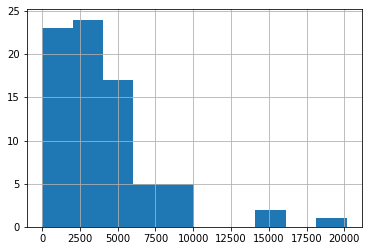

In [10]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()

num_collections.hist(ax=ax)